# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement: 
- To determine if the new webpage for E-News Express improves conversion rate of viewers to subscribers

### Objectives:
- To assess whether the viewer retention period and conversion rate is improved using the new webpage
- To see if the preferred language is a significant parameter influencing viewer retention and conversion rate

### Setting up $H_{0}$ and $H_{a}$ :
- $H_{o}$ : The new webpage does not improve viewer to subscriber conversion rate
- $H_{a}$ : The new webpage does improve viewer to subscriber conversion rate

### Key Variables
- Level of Significance *$ \alpha = 5 $*%
- Sample size *$ n = 100 $*

## Import all the necessary libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import scipy.stats as stats

## Reading the Data into a DataFrame

In [151]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [152]:
df.head(10) # Displays first 10 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [153]:
df.tail(10) #Displays Last 10 rows of the dataset

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
90,546477,treatment,new,5.40,no,French
91,546451,treatment,new,8.47,yes,English
92,546566,control,old,8.35,no,French
93,546474,treatment,new,4.94,no,French
94,546550,control,old,3.05,no,English
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [154]:
df.shape # Displays number of rows and columns in the dataset respectively

(100, 6)

In [155]:
df['user_id'] = df['user_id'].astype(str) # Convert User ID into a string
df.describe() # Displays Statistical Summary of the Data

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [156]:
df.isnull().sum() # Shows number of null entries

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [157]:
df[df.duplicated(['user_id'], keep=False)].count() # Displays any rows with duplicate User IDs 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Section Summary:
#### Within the dataset:
    - There are 100 rows and 6 columns
    - There are no null values
    - There are no duplicate values

#### The statistical summary with regards to the amount of time spent on the webpage by the users:
    - The mean is 5.38 mins
    - The standard dev is 2.38 mins
    - The min 0.19 mins
    - The max is 10.71 mins


## Univariate Analysis

### [1] Countplot of the user's language preference

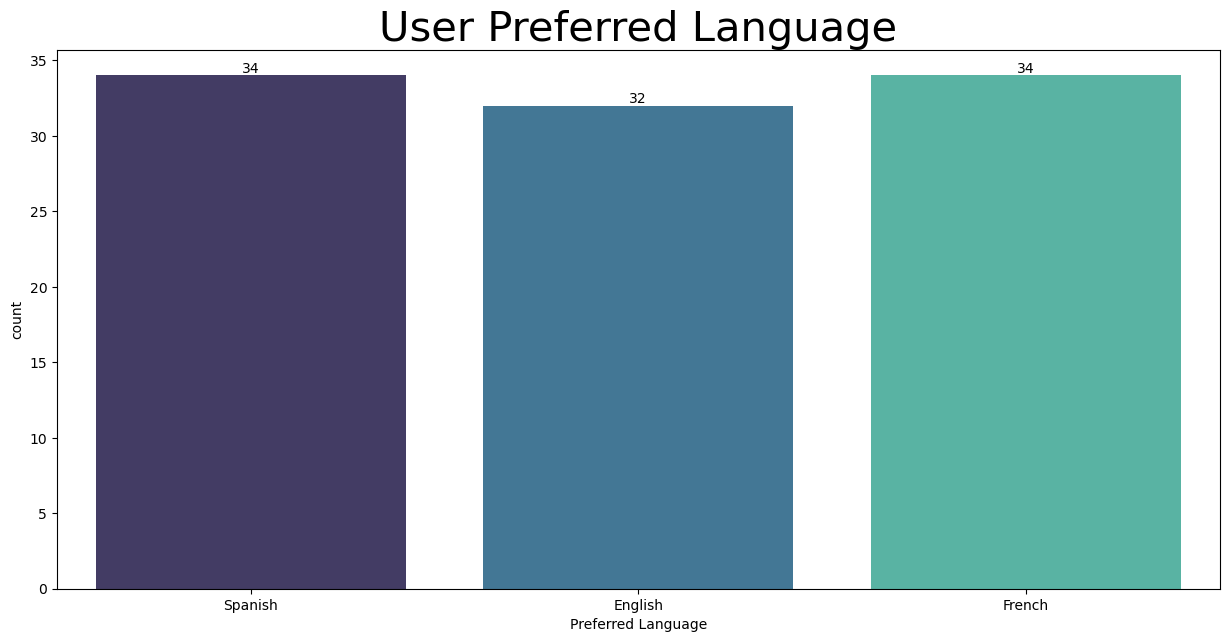

In [158]:
plt.figure(figsize=(15,7)) # Establish Plot Area
fig1 = sns.countplot(data=df,x='language_preferred', palette = 'mako') # Create a countplot

# Adding graph title, axis label and value labels
plt.xlabel('Preferred Language')
plt.title('User Preferred Language', fontsize = 30) 
fig1.bar_label(fig1.containers[0], label_type='edge'); 

### [2] Boxplot of user time spent on the webpage

the median time spent on the landing page (regardless of group type) is 5.415 minutes


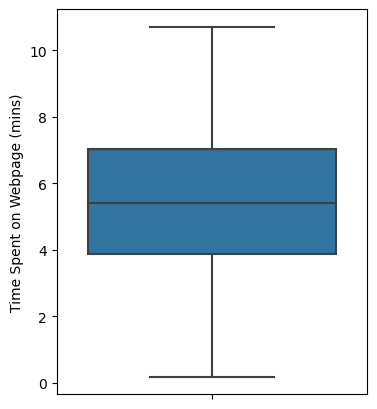

In [179]:
# Creating a boxplot of user time spent on the landing page and printing the median time

plt.figure(figsize=(4,5))
sns.boxplot(data=df, y='time_spent_on_the_page')
plt.ylabel('Time Spent on Webpage (mins)')
print(f"the median time spent on the landing page (regardless of group type) is {df['time_spent_on_the_page'].median()} minutes")

### [3] Countplot of number of users converted to e-news subscribers

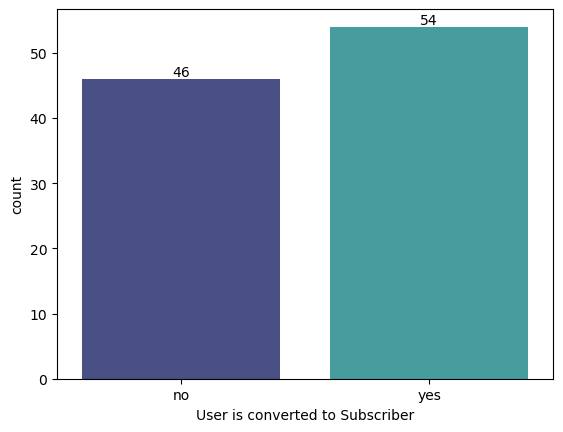

In [160]:
# Creating and labelling a countplot of the number of users converted in the dataset

fig3= sns.countplot(data=df,x='converted', palette = 'mako')
fig3.bar_label(fig3.containers[0], label_type='edge')
plt.xlabel('User is converted to Subscriber');

### Section Summary:
- Univariate Analysis was conducted on the dataset:
    - Users had 3 preferred languages with a relatively even split (34% each preferring Spanish and French and 32% preferring English)
    - The median time spent on the landing page is around 5.4 minutes, with the majority of users spending between 4-7 minutes on the page
    - Regardless of experimental group, 54% of users were converted to subscribers

### Bivariate Analysis

### [1] Are people who spend more time on the landing page more likely to get converted?

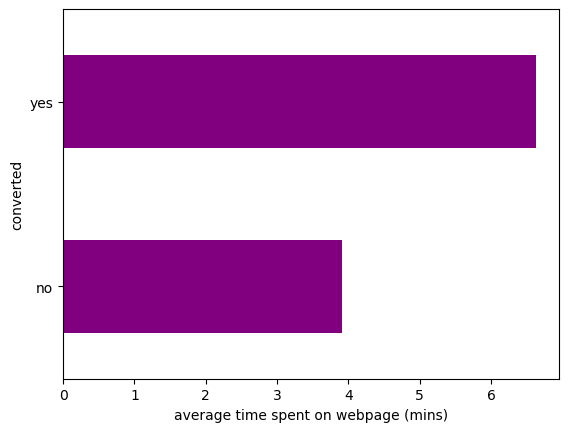

In [161]:
# Finding the mean of all user times categorized based on whether the individuals were converted into a subscriber using the groupby function
# Plotting and lavbelling the grouped data

df.groupby('converted')['time_spent_on_the_page'].mean(numeric_only = True).plot.barh(color = 'purple')
plt.xlabel('average time spent on webpage (mins)');

### [2] Does User Language affect retention time

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

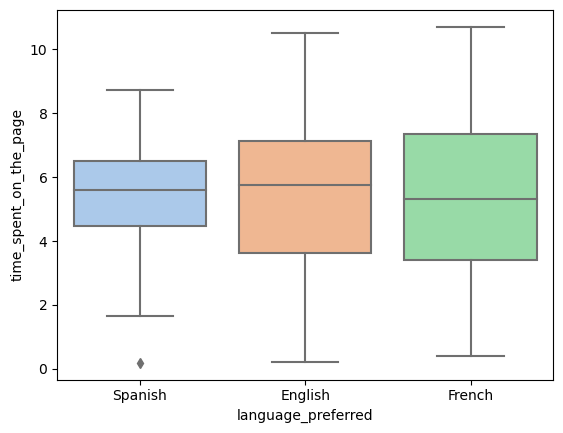

In [162]:
# Creating a bar plot on the time spent on the landing page based off user's preferred language

sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette = 'pastel')

### [3] Comparing which webpage possesses greater user retention

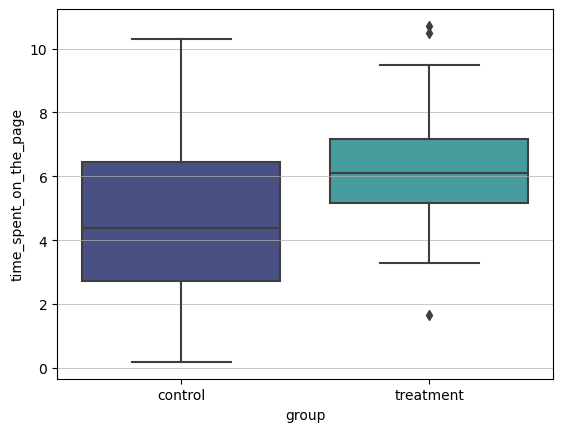

In [163]:
# Creating a box plot of time spent on the landing page categorized by the experimental group

sns.boxplot(data=df, x='group', y='time_spent_on_the_page', palette = 'mako');
plt.grid(axis='y', linewidth=0.5)

### Section Summary:
- Bivariate Analysis was conducted on the dataset:
    - Converted users on average spent over 2 minutes longer on the landing page than unconverted users
    - While preferred language seems to have minimal correlation with the user retention time, French users still spend on average 20 seconds less on the landing page than other language users
    - The treatment group spend on average almost 2 minutes longer on the landing page than the control group

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

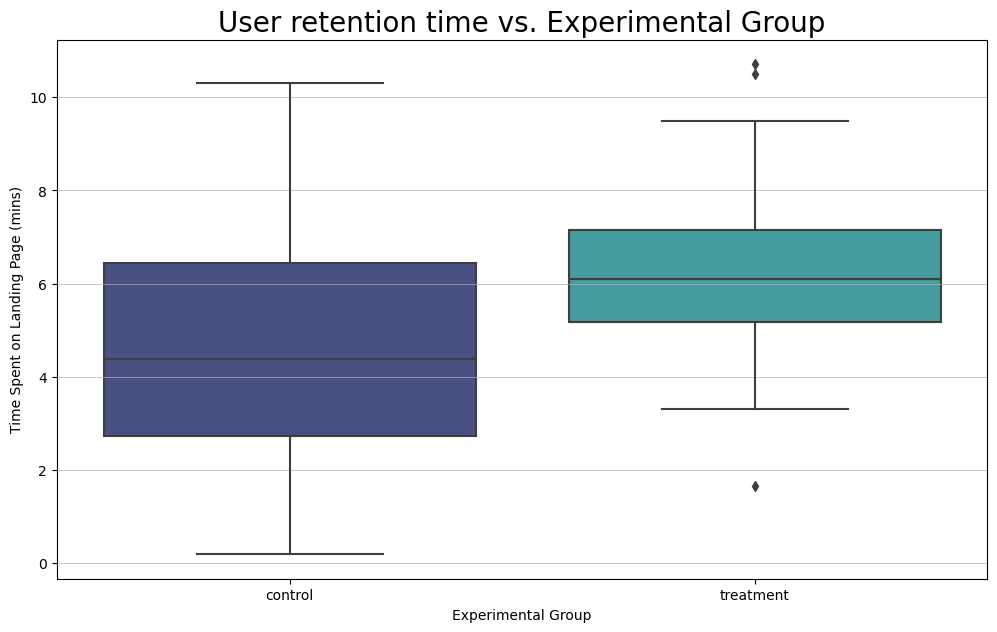

In [164]:
# Generating the same plot as previous for clearer visualization

plt.figure(figsize=(12,7)) # Generate plot area
sns.boxplot(data=df, x='group', y='time_spent_on_the_page', palette = 'mako') # Create a boxplot with color palette mako (blue/cyan gradient)
plt.grid(axis='y', linewidth=0.5) # Adding horizontal lines in the graph
plt.ylabel('Time Spent on Landing Page (mins)') # Adding y-axis label
plt.xlabel('Experimental Group') # Adding x-axis label
plt.title('User retention time vs. Experimental Group', fontsize = 20) ; # Adding Graph Title

### Step 1: Define the null and alternate hypotheses

#### Where *$ \mu_{1} $* = population mean of old landing page retention time and *$ \mu_{2} $*  = population mean of new landing page retention time (in mins) :

- $H_{o}$ : Users do not spend more time on the new landing page ($ \mu_{1} =  \mu_{2} $ )
- $H_{a}$ : Users spend more time on the new landing page ($ \mu_{1} < \mu_{2} $)

### Step 2: Select Appropriate test

#### Since we are comparing sample means from 2 independent populations and the standard deviation is unknown, we can go for the 2 sample independent t-test, but first we need to check if t-test assumptions hold true

In [165]:
print(df.groupby('group')['time_spent_on_the_page'].mean(numeric_only = True)) # Displays Sample Mean of the groups
print(df.groupby('group')['time_spent_on_the_page'].std()) # Displays Sample Std Dev of the groups

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64
group
control      2.581975
treatment    1.817031
Name: time_spent_on_the_page, dtype: float64


### Assumptions:
- *The Data Is Continuous*: Yes
- *The populations are independent of one another*: We can assume yes as there is no statement indicating otherwise
- *Individuals were randomly selected*: Yes, it was mentioned in the problem statement
- *Equal Population standard deviation*: The sample standard deviation is different between both groups, for now we can assume this reflects the group's population std. deviation as well. So we may have to go for 2 sample t-test of unequal variance
- *The Data is normally distributed*: As sample size n>30, according to central limit theorem we can assume that the data is normally distributed

#### - Therefore we can go for 2 sample t-test with unequal variance

### Step 3: Decide the significance level

As mentioned in the problem statement
- Level of Significance *$ \alpha = 0.05 $*

### Step 4: Collect and prepare data

From Step 2:
- $\bar x_{1}$ = 4.53 mins
- $\bar x_{2}$ = 6.22 mins 
- $ s_{1} $ = 2.58 mins 
- $ s_{2} $ = 1.82 mins
- $\alpha$ = 0.05
- $n$ = 100

### Step 5: Calculate the p-value

In [166]:
df_control = df[df['group'] =='control'].reset_index(drop=True) # Creating a new dataframe for the control group
df_treatment = df[df['group'] =='treatment'].reset_index(drop=True) # Creating a new dataframe for the treatment group

In [167]:
# importing the function required to carry out the t-test
from scipy.stats import ttest_ind

# finding the p-value
test_stat, p_value = ttest_ind(df_control['time_spent_on_the_page'], df_treatment['time_spent_on_the_page'], equal_var = False, alternative = 'less')
print(f'the p_value is {round(p_value, 6)}') # display the p-value rounded to 6 d.p.

the p_value is 0.000139


### Step 6: Compare the p-value with $\alpha$

### The p-value of 0.000139 is significantly smaller than $\alpha$ of 0.05 therefore we can *reject* the null hypothesis

### Step 7:  Draw inference

### Section Summary
>As we are rejecting the null hypothesis, we can say (with at least 95% confidence) that users do spend more time on the new landing page compared to the older one

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### 2.1 Visual Analysis

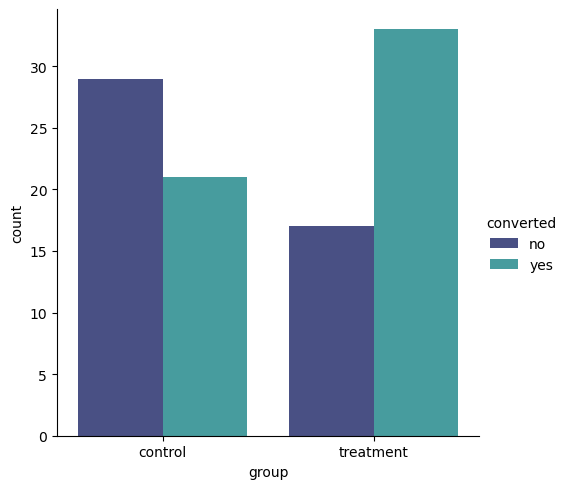

In [168]:
# Create a grouped countplot to compare conversion rates between both experimental groups
sns.catplot(data=df, kind="count", x="group", hue="converted", palette="mako");

### 2.2 Formulating the Null and Alternate Hypothesis
#### Where *$ p_{1} $* = conversion rate of the old landing page and *$ p_{2} $*  = conversion rate of the new landing page:

- $H_{o}$ : Conversion Rate for the new page is not greater than the covertion rate for the old page ($ p_{1} =  p_{2} $ )
- $H_{a}$ : Conversion Rate for the new page is greater than the covertion rate for the old page ($ p_{1} < p_{2} $)

In [149]:
# Finding the conversion rate by filtering the data according to who subscribed and counting the total number of rows that satisfy the condition

print('p1 = '  + str(df_control[df_control['converted']=='yes'].shape[0]) + '/50')
# Prints fraction on Total converted users to all users in the control group 

print('p2 = ' + str(df_treatment[df_treatment['converted']=='yes'].shape[0])  + '/50') 
# Prints fraction on Total converted users to all users in the treatment group

p1 = 21/50
p2 = 33/50


- As we are comparing 2 proportions with each other, we can utilize the 2 proportion z-test, but first we must check if the assumptions hold true

In [46]:
# To check if binomial distribution can be approximated to normal distribution, we have to see if the following parameters are >= 10

n = 50
p1 = 21/50
p2 = 33/50

print(n*p1, round(n*(1-p1),2)) # Print values of np1 and n(1-p1)
print(n*p2, n*(1-p2)) # Print values of np2 and n(1-p2)

21.0 29.0
33.0 17.0


### 2.3 Assumptions:
- *The populations are independent of one another*: We can assume yes as there is no statement indicating otherwise
- *Individuals were randomly selected*: Yes, it was mentioned in the problem statement
- *Binomially Distributed Population*: Yes, the person can either be converted to a subscriber or not
- *Can Binomial Distribution be Approximated to normal*: As the results of the above calculations > 10, according to central limit theorem we can assume that the data is normally distributed

>Therefore we can use 2 proportion z-test

- $n_{1} = 50$
- $n_{2} = 50$
- $p_{1} = \frac{21}{50}$
- $p_{2} = \frac{33}{50}$
- $\alpha = 0.05$

### 2.4 Calculating p-value

In [169]:
# importing the necessary function
from statsmodels.stats.proportion import proportions_ztest

converted_users = np.array([21,33]) # create an array containing np1 and np2
sample_sizes = np.array([50,50]) # create an array containng n1 and n2 

test_stat,p_value = proportions_ztest(converted_users,sample_sizes) # Carry out the z-test to find the p value
round(p_value,5) # display the p-value rounded to 5 d.p.

0.01605

### 2.5 Section Summary
>As the p-value of 0.016 is smaller than the level of significance of 0.05, we can *reject* the null hypothesis and say with at least 95% confidence that the new landing page leads to a higher user conversion rate than the old landing page

## 3. Is the conversion and preferred language are independent or related?

### 3.1 Visual Analysis

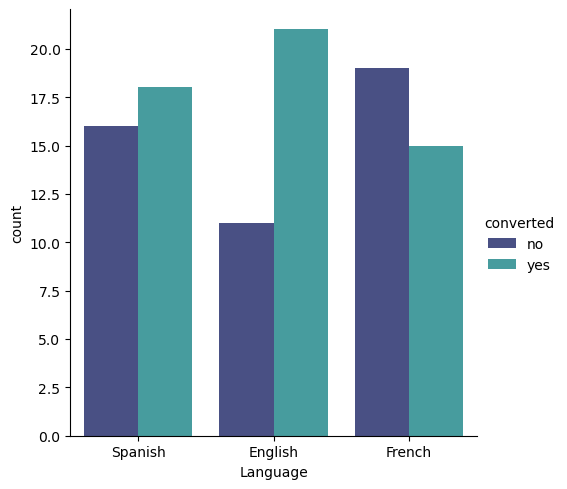

In [170]:
# Create a grouped countplot to compare preferred languages with conversion rates 
sns.catplot(data=df, kind="count", x="language_preferred", hue="converted", palette="mako") 
plt.xlabel("Language"); # Add x-axis label

### 3.2 Formulating the Null and Alternate Hypothesis

- $H_{o}$ : Conversion Rate and preferred language are independent of each other 
- $H_{a}$ : Conversion Rate and preferred language are not independent of each other 

In [171]:
# Finding the number of users converted and unconverted based on preferred language

print(df[df['converted']=='yes']['language_preferred'].value_counts())
df[df['converted']=='no']['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64


French     19
Spanish    16
English    11
Name: language_preferred, dtype: int64

In [172]:
# Creating a Contigency Table using the above data

df_contingency = pd.read_csv('E-news_contingency.csv')
df_contingency.head()

,Languages,Converted,Not Converted
0,English,21,11
1,Spanish,18,16
2,French,15,19


### 3.3 Assumptions
- *Categorical Variables*: Language and user conversion are both categorical variables
- *Expected value of sample observations in each level of the varaible is >= 5*: Yes all observational values are > 5
- *Random Sampling*: Yes, the collected sample is random as informed in the problem statement

>Therefore we can use the Chi Square Test for Independence 

$ \alpha = 0.05 $

### 3.4 Finding p-value

In [173]:
# importing the required function
from scipy.stats import chi2_contingency 

# finding the p-value
chi, p_value, dof, expected = chi2_contingency(df_contingency.drop('Languages', axis = 1))
print(round(p_value,5))

0.21299


### 3.5 Section Summary

>As the p-value of 0.213 is much larger than the significance level, we cannot reject the null hypothesis

>Therefore we can say that preferred language and user conversion are *independent* of each other

## 4. Is the time spent on the new page same for the different language users?

### 4.1 Visual Analysis

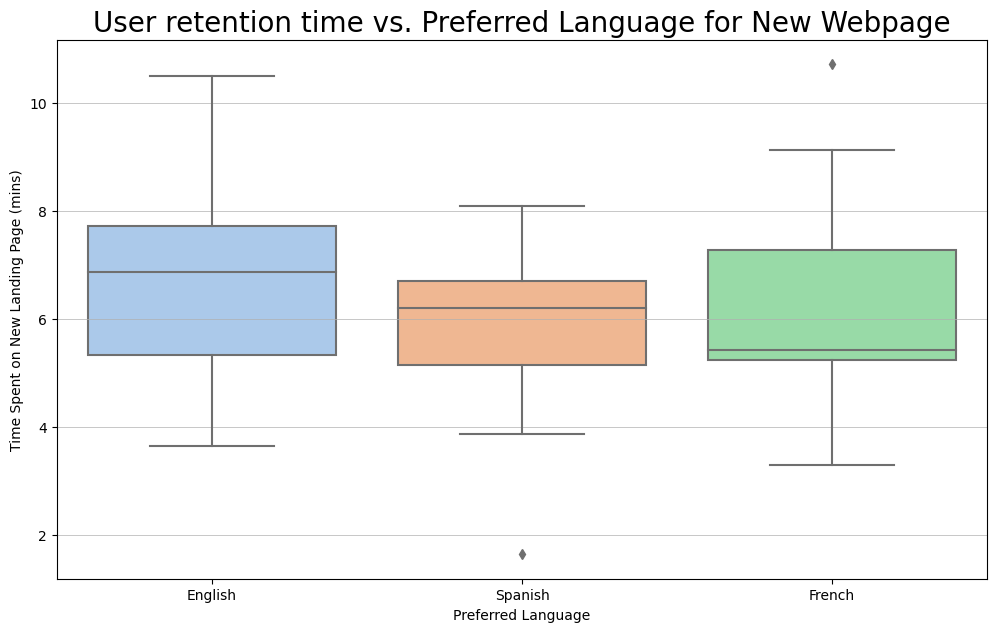

In [174]:
# Creating a bar plot on the time spent on the new landing page based off user's preferred language

plt.figure(figsize=(12,7)) # Generate plot area
sns.boxplot(data=df_treatment, x='language_preferred', y='time_spent_on_the_page', palette = 'pastel')

plt.grid(axis='y', linewidth=0.5) # Adding horizontal lines in the graph
plt.ylabel('Time Spent on New Landing Page (mins)') # Adding y-axis label
plt.xlabel('Preferred Language') # Adding x-axis label
plt.title('User retention time vs. Preferred Language for New Webpage', fontsize = 20) ; # Adding Graph Title

### 4.2 Formulating the Null and Alternate Hypothesis

- $H_{o}$ : Time spent on the new landing page is the same for different language users ($ \mu_{1} =  \mu_{2} = \mu_{3} $ )
- $H_{a}$ : Time spent on the new landing page is different for different language users

### 4.3 Assumptions

#### 4.3.1 Shapiro-Wilk's Test
>$H_{o}$ : Time spent on the new landing page follows a normal distribution 


>$H_{a}$ : Time spent on the new landing page does not follow a normal distribution 

In [175]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_treatment['time_spent_on_the_page']) 
print('The p-value is', p_value) # display the p-value

The p-value is 0.8040016293525696


- Since p-value is very large, we fail to reject the null hypothesis that the retention time follows the normal distribution.

#### 4.3.2 Levene’s test

>$H_{o}$: All the population variances are equal


>$H_{a}$: At least one variance is different from the rest

In [176]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_treatment['time_spent_on_the_page'][df_treatment['language_preferred']=="English"], 
                                   df_treatment['time_spent_on_the_page'][df_treatment['language_preferred']=="Spanish"], 
                                   df_treatment['time_spent_on_the_page'][df_treatment['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value) # display the p-value

The p-value is 0.46711357711340173


- Since the p-value is very large, we fail to reject the null hypothesis of homogeneity of variances.

- *The populations are normally distributed* - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- *Samples are independent simple random samples* - Yes, we are informed that the collected sample is random as per the problem statement.
- *Population variances are equal* - Yes, the homogeneity of variance assumption is verified using the Levene's test.

>Therefore we can go for One-Way ANOVA Test

### 4.4 Finding p-value

In [177]:
#import the required function
from scipy.stats import f_oneway

# Perform one-way anova test
test_stat, p_value = f_oneway(df_treatment.loc[df_treatment['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_treatment.loc[df_treatment['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df_treatment.loc[df_treatment['language_preferred'] == 'French', 'time_spent_on_the_page'])

print('The p-value is ' + str(round(p_value,5))) # Display the p-value rounded to 5 d.p.

The p-value is 0.43204


### 4.5 Section Summary

>As the p-value of 0.43204 is much larger than the significance level of 0.05, we cannot reject the null hypothesis

>Therefore we can say that the time spent on the new landing page is not different for different language users with a 5% significance level

## Conclusion and Business Recommendations

### Conclusions
- Users had 3 preferred languages with a relatively even split (34% each preferring Spanish and French and 32% preferring English)
- The median time spent on the landing page is around 5.4 minutes, with the majority of users spending between 4-7 minutes on the page
- Regardless of experimental group, 54% of users were converted to subscribers
- Converted users on average spent over 2 minutes longer on the landing page than unconverted users
- The treatment group spend on average almost 2 minutes longer on the new landing page than the control group on the old landing page

#### With 95% Confidence we can say that:
- Users spend more time on the new landing page compared to the older one
- The new landing page leads to a higher user conversion rate than the old landing page
- Preferred language and user conversion are *independent* of each other
- The time spent on the new landing page is not different for different language users


### Recommendations

- Implement the new landing page as it has proven to effectively improve user to subscriber conversion rate and viewer retention periods
- While the preferred languages don't affect viewer retention or conversion rate, adding more language options can still improve the user's experience and can attract a variety of new audiences 
- The even spread in preferred languages indicates a uniform demographic spread, so making sure to not only focus on one demographic and having a variety of pages and articles that appeal to the different audiences can improve engagement with the website 
- As the average time spent on the new landing page is around 6 minutes, creating articles with an average estimated read time of 6 minutes formatted similarly to the successful new landing page can enable the typical user to complete reading the entire news article and conisder subscribing from there if they were satisfied 
- Additionally a pop up after the estimated read time to remind and/or convince the user to subscribe to the E-News website can improve subscription rates